<a href="https://colab.research.google.com/github/manishkolla/Zillow-Home-Value-Prediction/blob/Prototypes/Data_Understanding_%26_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
#reading the csv files
bedroom1=pd.read_csv("drive/MyDrive/1Bed_county.csv")
bedroom2=pd.read_csv("drive/MyDrive/2Bed_county.csv")
bedroom3=pd.read_csv("drive/MyDrive/3Bed_county.csv")
bedroom4=pd.read_csv("drive/MyDrive/4Bed_county.csv")
bedroom5=pd.read_csv("drive/MyDrive/5Bed_county.csv")
df1 = pd.DataFrame(bedroom1)
df2 = pd.DataFrame(bedroom2)
df3 = pd.DataFrame(bedroom3)
df4 = pd.DataFrame(bedroom4)
df4 = pd.DataFrame(bedroom4)
df5=  pd.DataFrame(bedroom5)
df1.drop(df1.columns[9:117], axis=1, inplace=True)
df2.drop(df2.columns[9:117], axis=1, inplace=True)
df3.drop(df3.columns[9:117], axis=1, inplace=True)
df4.drop(df4.columns[9:117], axis=1, inplace=True)
df5.drop(df5.columns[9:117], axis=1, inplace=True)

FileNotFoundError: ignored

In [ ]:
states=df1["State"].unique()
for state in states:
    grouped = df1[df1["State"] == state]
    for date in df1.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df1.update(grouped)
print("Df1 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df1.to_csv('/content/drive/My Drive/FDS project/NoNull_B1_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df2["State"].unique()
for state in states:
    grouped = df2[df2["State"] == state]
    for date in df2.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df2.update(grouped)
    #df=pd.concact([grouped])
print("Df2 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df2.to_csv('/content/drive/My Drive/FDS project/NoNull_B2_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df3["State"].unique()
for state in states:
    grouped = df3[df3["State"] == state]
    for date in df3.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df3.update(grouped)
    #df=pd.concact([grouped])
print("Df3 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df3.to_csv('/content/drive/My Drive/FDS project/NoNull_B3_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df4["State"].unique()
for state in states:
    grouped = df4[df4["State"] == state]
    for date in df4.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df4.update(grouped)
    #df=pd.concact([grouped])
print("Df4 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df4.to_csv('/content/drive/My Drive/FDS project/NoNull_B4_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
states=df5["State"].unique()
for state in states:
    grouped = df5[df5["State"] == state]
    for date in df5.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df5.update(grouped)
    #df=pd.concact([grouped])
print("Df5 is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df5.to_csv('/content/drive/My Drive/FDS project/NoNull_B5_County.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

In [ ]:
print(df1.columns)
print(df1["RegionID"].unique())
print(len(df3["RegionID"].unique()))

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2009-01-31',
       ...
       '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
      dtype='object', length=186)
[3101.  139. 1090. ... 2366. 1925. 1933.]
2805


In [ ]:
df1.drop(df1.columns[1:9], axis=1, inplace=True)
df2.drop(df2.columns[1:9], axis=1, inplace=True)
df3.drop(df3.columns[1:9], axis=1, inplace=True)
df4.drop(df4.columns[1:9], axis=1, inplace=True)
df5.drop(df5.columns[1:9], axis=1, inplace=True)

In [ ]:
print(df1.columns)
print(df1["RegionID"].unique())
print(len(df3["RegionID"].unique()))

Index(['RegionID', '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
       '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30',
       ...
       '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30'],
      dtype='object', length=178)
[3101.  139. 1090. ... 2366. 1925. 1933.]
2805


In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
# Assuming your data looks like: RegionID, Date1, Date2, ..., DateN
# Melt the dataframe to transform dates into rows
md1 = pd.melt(df1, id_vars='RegionID', var_name='Date', value_name='Price')
print(md1.columns)
md1['Date'] = pd.to_datetime(md1['Date'])

# Iterate through each RegionID and perform forecasting
region_ids = md1['RegionID'].unique()

forecasts = []
for region_id in region_ids:
    # Filter data for the current RegionID
    rd1 = md1[md1['RegionID'] == region_id]

    # Rename columns for Prophet ('ds' for date and 'y' for price)
    rd1 = rd1.rename(columns={'Date': 'ds', 'Price': 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model
    model.fit(rd1)

    # Create future dates to predict
    future = model.make_future_dataframe(periods=12, freq='M')  # Predicting 12 months into the future

    # Make predictions
    forecast = model.predict(future)

    # Append forecast to list of forecasts
    forecasts.append(forecast)

# Concatenate forecasts for all regions
all_forecasts = pd.concat(forecasts)

# Visualize or analyze the combined forecasts
# ... (plotting, evaluation, etc.)


In [ ]:
print(all_forecasts.shape)

(280746, 16)
yearly                        0
yearly_lower                  0
yearly_upper                  0
multiplicative_terms          0
multiplicative_terms_lower    0
multiplicative_terms_upper    0
yhat                          0
dtype: int64


In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df5.iloc[:,9:].isnull().sum())
n=[]
for x in df1.isnull().sum():
  if x> 0.65*df1.shape[0]:
    n.append(x)
print(len(n))
def null(df):
  print(df.columns[(df.isnull().sum() / len(df)) > 0.65])

(1490, 178)
(2532, 178)
(2805, 178)
(2522, 178)
(1815, 178)
2009-09-30    0
2009-10-31    0
2009-11-30    0
2009-12-31    0
2010-01-31    0
             ..
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
Length: 169, dtype: int64
0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is named df
# Assuming columns: 'RegionID', '1/31/2009', '2/28/2009', ..., '3/31/2012'

# Melt the dataframe to transform dates into rows
melted_df1 = pd.melt(df1, id_vars='RegionID', var_name='Date', value_name='Price')
print(melted_df1.columns)

# Convert 'Date' to datetime
melted_df1['Date'] = pd.to_datetime(melted_df1['Date'])

# Encode 'RegionID' using LabelEncoder
label_encoder = LabelEncoder()
melted_df1['RegionID'] = label_encoder.fit_transform(melted_df1['RegionID'])

# Convert 'Date' to numerical format (number of days since the start date)
melted_df1['Days'] = (melted_df1['Date'] - melted_df1['Date'].min()).dt.days

# Define features (X) and target variable (y)
X = melted_df1[['RegionID', 'Days']]
#y = melted_df1['Price']

# Check for missing values in the 'Price' column
missing_values = melted_df1['Price'].isnull().sum()
if missing_values > 0:
    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean')
    melted_df1['Price'] = imputer.fit_transform(melted_df1[['Price']])
print(melted_df1.columns)
print(melted_df1.iloc[:,:].isnull().sum())

y = melted_df1['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2}')
print(f'Mean Absolute Error (Linear Regression): {mae}')

Index(['RegionID', 'Date', 'Price'], dtype='object')
Index(['RegionID', 'Date', 'Price', 'Days'], dtype='object')
RegionID    0
Date        0
Price       0
Days        0
dtype: int64
Mean Squared Error: 6364591057.083206
R-squared (Random Forest): 0.10649474412873616
Mean Absolute Error (Linear Regression): 51999.112190896754


#Project Name: Zillow Home Value Prediction

Data Source:
https://www.zillow.com/research/data/

*Data Explanation*: We have taken the data based upon County starting from 1 bedroom to 5 bedroom homes from the years 2000 till 2023.

Each of the bedrooms has a separate dataset, so in total there are 5 different datasets for a total of 1-5 bedroom home prices. Here are the properties of each dataset:

1. All the datasets have same exact schema of columns and formatting
2. Each dataset has the following columns: 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',  'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', and the prices for each month starting from January 2000 till September 2023 which is 285 months in total
3. All the rows are unique and there are no duplicate entries
4. The only categorical feature with null values is Metro which is approximately equal to 30%, this feature has null values across all the individual datasets, the best optimized approach is to remove this feature because imputation is not possible.
The sizes of the datasets are:
  1. Dataset 1 with 1 bedroom houses:
      - Rows: 1490, Columns: 294
      - 108 columns with null values greater than 50%
        - The years with those null values are from 2000-2008
      - 4 columns with null values greater than 65%
        - The months of these null values from Jan 2000 till April 2000.
2. Dataset 2 with 2 bedroom houses:
  - Rows: 2532, Columns: 294
  - 107 columns with null values greater than 50%
    - The years with those null values are from 2000-2008
  - 0 columns with null values greater than 65%
3. Dataset 3 with 3 bedroom houses:
  - Rows: 2805, Columns: 294
  - 107 columns with null values greater than 50%
    - The years with those null values are from 2000-2008
- 0 columns with null values greater than 65%
4. Dataset 4 with 4 bedroom houses:
  - Rows: 2522, Columns: 294
  - 98 columns with null values greater than 50%
    - The years with those null values are from 2000-2008
  - 0 columns with null values greater than 65%
5. Dataset 5 with 5 bedroom houses:
  - Rows: 1815, Columns: 294
  - 77 columns with null values greater than 50%
    - The years with those null values are from 2000-2006
  - 0 columns with null values greater than 65%

*Data Quality Check*: Each individual dataset has all the 51 US states and the merged dataset has 1684 unique counties.

*Data Merging*: Merging all the 5 datasets into a unified single dataset with the addition of a new feature to each individual dataset which features “Bedroom” which contains the number of the numbers. For instance using value 1 for 1 bedroom dataset, and 2 for 2 bedroom dataset and so on. After adding this new feature to each of the individual datasets then concatenate them to a single dataset with dimensions (11164, 295).

The merged dataset has 102 columns with null values greater than 50% and those columns are ranging from 2000 to 2008.

*Removal of Columns with null values*: The best solution in this dataset when handling null values is to remove the columns from years 2000 till 2008 such that the rest of the data will be having minimal number of null values.

**Data Imputation:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is named df
# Assuming columns: 'RegionID', '1/31/2009', '2/28/2009', ..., '3/31/2012'

# Melt the dataframe to transform dates into rows
melted_df1 = pd.melt(df1, id_vars='RegionID', var_name='Date', value_name='Price')

# Convert 'Date' to datetime
melted_df1['Date'] = pd.to_datetime(melted_df1['Date'])

# Encode 'RegionID' using LabelEncoder
label_encoder = LabelEncoder()
melted_df1['RegionID'] = label_encoder.fit_transform(melted_df1['RegionID'])

# Convert 'Date' to numerical format (number of days since the start date)
melted_df1['Days'] = (melted_df1['Date'] - melted_df1['Date'].min()).dt.days

# Check for missing values in the 'Price' column
missing_values = melted_df1['Price'].isnull().sum()
if missing_values > 0:
    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean')
    melted_df1['Price'] = imputer.fit_transform(melted_df1[['Price']])

# Define features (X) and target variable (y)
X = melted_df1[['RegionID', 'Days']]
y = melted_df1['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Squared Error (Random Forest): 46885888.67881736
R-squared (Random Forest): 0.9934178350839846
Mean Absolute Error (Random Forest): 2098.5460693919117


In [ ]:
"""Adding a new feature bedroom and adding the value to all the rows in the dataset
index=0
df1.insert(index,"Bedrooms",1)
df2.insert(index,"Bedrooms",2)
df3.insert(index,"Bedrooms",3)
df4.insert(index,"Bedrooms",4)
df5.insert(index,"Bedrooms",5)

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(1490, 186)
(2532, 186)
(2805, 186)
(2522, 186)
(1815, 186)


In [ ]:
"""l=[]
for x in df1.iloc[:,10:].isnull().sum():
    if x>100:
        l.append(x)

print(len(l))

In [ ]:
#import pandas as pd
#import numpy as np
"""from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
data=df1.iloc[:,10:]
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df1.iloc[:,10:].isnull().sum()

2009-02-28    693
2009-03-31    662
2009-04-30    647
2009-05-31    633
2009-06-30    627
             ... 
2023-05-31     21
2023-06-30     20
2023-07-31     20
2023-08-31     20
2023-09-30      0
Length: 176, dtype: int64

In [ ]:
l=[]
for x in df2.iloc[:,10:].isnull().sum():
    if  x>100:
        l.append(x)

print(len(l))
null_counts = df1.iloc[:,10:].isnull().sum()
columns_with_nulls = null_counts[null_counts>100].index
print(columns_with_nulls)

108
Index(['2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30',
       '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30',
       ...
       '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
       '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-03-31'],
      dtype='object', length=133)


In [ ]:
print(df2.isnull().sum().head(20))

RegionID         0
2009-01-31    1164
2009-02-28    1086
2009-03-31     984
2009-04-30     923
2009-05-31     885
2009-06-30     855
2009-07-31     833
2009-08-31     823
2009-09-30     803
2009-10-31     796
2009-11-30     791
2009-12-31     789
2010-01-31     787
2010-02-28     784
2010-03-31     777
2010-04-30     774
2010-05-31     764
2010-06-30     761
2010-07-31     750
dtype: int64


RegionID                0
SizeRank                0
RegionName              0
RegionType              0
StateName               0
State                   0
Metro                 864
StateCodeFIPS           0
MunicipalCodeFIPS       0
2009-01-31           1164
2009-02-28              0
2009-03-31              0
2009-04-30              0
2009-05-31              0
2009-06-30              0
2009-07-31              0
2009-08-31              0
2009-09-30              0
2009-10-31              0
2009-11-30              0
dtype: int64


In [ ]:
# Assuming your data looks like: RegionID, Date1, Date2, ..., DateN
# Melt the dataframe to transform dates into rows
mdd1 =
md1 = pd.melt(df1, id_vars='RegionID', var_name='Date', value_name='Price')
md1['Date'] = pd.to_datetime(md1['Date'])

# Iterate through each RegionID and perform forecasting
region_ids = md1['RegionID'].unique()

forecasts = []
for region_id in region_ids:
    # Filter data for the current RegionID
    rd1 = md1[md1['RegionID'] == region_id]

    # Rename columns for Prophet ('ds' for date and 'y' for price)
    rd1 = rd1.rename(columns={'Date': 'ds', 'Price': 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model
    model.fit(rd1)

    # Create future dates to predict
    future = model.make_future_dataframe(periods=12, freq='M')  # Predicting 12 months into the future

    # Make predictions
    forecast = model.predict(future)

    # Append forecast to list of forecasts
    forecasts.append(forecast)

# Concatenate forecasts for all regions
all_forecasts = pd.concat(forecasts)

# Visualize or analyze the combined forecasts
# ... (plotting, evaluation, etc.)


ParserError: ignored

In [ ]:
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.shape

(11164, 187)

In [ ]:
print((3489/11164)*100)

31.252239340738086


In [ ]:
print(df["Metro"].isnull().sum())

3489


In [ ]:
def null(df):
  print(df.columns[(df.isnull().sum() / len(df)) > 0.50])
null(df)
df[df.duplicated()]

Index([], dtype='object')


,Bedrooms,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30


In [ ]:
print(df["RegionName"].unique())
print(len(df["RegionName"].unique()))

['Los Angeles County' 'Cook County' 'Harris County' ... 'Wibaux County'
 'Keya Paha County' 'Hooker County']
1684


In [ ]:
df.to_csv('/content/drive/My Drive/FDS project/NoNull_median_B1_5_county.csv')

In [ ]:
df=pd.read_csv("/content/drive/My Drive/FDS project/NoNull_median_B1_5_county.csv")

In [ ]:
null_counts = df.iloc[:,10:].isnull().sum()
columns_with_nulls = null_counts[null_counts>500].index
#print(len(columns_with_nulls))

#print(columns_with_nulls)

l=[]
for x in df.iloc[:,10:].isnull().sum():
    if x>100:
        l.append(x)

print(len(l))
df.iloc[:,10:].isnull().sum()

0


MunicipalCodeFIPS     0
2009-01-31           37
2009-02-28           19
2009-03-31            4
2009-04-30            4
                     ..
2023-05-31            0
2023-06-30            0
2023-07-31            0
2023-08-31            0
2023-09-30            0
Length: 178, dtype: int64

In [ ]:
states=df["State"].unique()
for state in states:
    grouped = df.groupby('State').get_group(state)
    for date in df.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
    df.update(grouped)
print("Df is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
df.to_csv('/content/drive/My Drive/FDS project/NoNull_median_B1_5_county.csv')
print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

Streaming output truncated to the last 5000 lines.
<ipython-input-25-615c66767512>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped[date].fillna(m, inplace=True)
<ipython-input-25-615c66767512>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped[date].fillna(m, inplace=True)
<ipython-input-25-615c66767512>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped[date].fillna(m, inplace=True)
<ipython-input-25-615c66767512>

Df is done!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
df.to_csv("LeastNull_median_B1_5_county.csv")

In [ ]:
null_counts = df.iloc[:,10:].isnull().sum()
columns_with_nulls = null_counts[null_counts>500].index
print(len(columns_with_nulls))

print(columns_with_nulls)

l=[]
for x in df.iloc[:,10:].isnull().sum():
    if x>500:
        l.append(x)

print(len(l))

0
Index([], dtype='object')
0


In [ ]:
print(df["Bedrooms"].nunique())
print(df["RegionName"].nunique())
print(df["State"].nunique())
print(df["Metro"].nunique())

5
1684
51
915


In [ ]:
null_counts = df.iloc[:,10:].isnull().sum()
print(df.iloc[:,10:])
print(null_counts)
# Filter columns with nulls greater than 5000
columns_with_nulls = null_counts.idxmax()
print(df["2009-01-31"].isnull().sum())
# Print the columns with nulls greater than 5000


print(columns_with_nulls)

2808


In [ ]:
l=[]
for x in df.iloc[:,10:].isnull().sum():
    if x>10:
        l.append(x)

print(len(l))
print(l)

0
[]


In [ ]:
#checking if every month is present or not 23*12 + 9= 285
print(len(df.iloc[:,10:].columns))

178


In [ ]:
quat_df=df.iloc[:,:10]

In [ ]:
prices_df=df.iloc[:,10:]

In [ ]:
prices_df.fillna(0)
prices_df

,MunicipalCodeFIPS,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,37.0,275306.849619,272160.658705,270168.488249,267437.983691,264498.296616,259862.020376,255241.018283,251435.138052,249486.604665,...,558680.159882,556727.465565,551423.664185,544767.977527,540915.706582,540070.138333,541628.580711,545234.965577,550341.354313,556154.194651
1,31.0,154860.938646,153070.354969,151312.760653,150999.019154,150326.692577,150386.375546,150194.267185,150189.688339,149171.410760,...,196311.572942,196744.473351,197142.521409,197864.342089,199280.609244,201040.677456,202815.132100,204479.178740,206433.154208,208529.513738
2,201.0,62285.163536,62143.567981,62005.392988,62067.215294,62043.013455,62208.042792,62351.602065,62324.590597,62164.528173,...,127962.219110,128407.716102,128701.889258,128944.189424,129131.875050,129215.863913,129299.392234,129419.776723,129701.192672,129898.490259
3,13.0,95969.312405,94037.663985,92507.510318,91267.337190,89587.122331,87710.858727,85539.198988,83373.509139,81192.419727,...,258158.468329,254532.267926,251048.337836,248310.713757,247010.439072,246383.855538,246558.041537,247465.381203,249200.078505,251086.989097
4,73.0,212362.749410,209611.558873,207441.009680,204238.682872,201462.667715,196780.556245,193671.483902,190190.869049,189058.992328,...,487054.063430,484964.803996,482881.358058,481546.702202,481828.629670,483989.314979,488288.007530,493199.813357,498655.089647,503837.152001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,105.0,242897.715252,241280.820603,224403.016907,224344.949953,224139.011224,240642.822395,240088.153030,239823.341968,239471.268767,...,320630.211525,319742.353396,317782.326403,313520.277679,309000.511410,306500.962475,305164.930972,304128.717373,302430.265576,301486.315206
11160,39.0,243734.152699,238463.710210,235087.565541,235390.013249,229965.721414,230160.074291,230452.108927,229888.875554,229469.536801,...,154698.323655,153543.096033,151931.195515,150228.381950,149254.090288,148756.907901,148299.061622,147996.911557,147983.533833,147873.292483
11161,153.0,243734.152699,238463.710210,235087.565541,235390.013249,229965.721414,230160.074291,230452.108927,229888.875554,229469.536801,...,180179.066804,177968.097441,174657.986038,170863.868133,167966.485837,165511.635484,163838.858691,163144.668390,163901.653486,165111.289914
11162,179.0,243734.152699,238463.710210,235087.565541,235390.013249,229965.721414,230160.074291,230452.108927,229888.875554,229469.536801,...,262670.665170,259996.000639,256042.749097,250639.325312,245267.533417,240741.738099,238723.654031,238071.562381,238150.050417,238497.833185


167633.84101020487
313675.4362468108
859


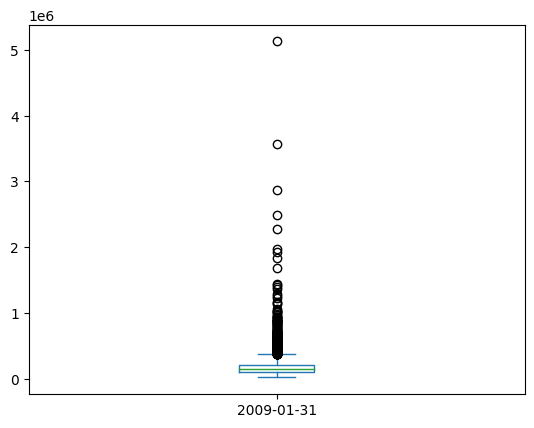

In [ ]:
df['2009-01-31'].plot.box()
median=df['2009-01-31'].median()
q3=df['2009-01-31'].quantile(0.75)
q1=df['2009-01-31'].quantile(0.25)
iqr=1.5*(q3-q1)
print(iqr)
print((median+iqr))
l=[]
for x in df['2009-01-31']:
    if x>(median+iqr):
        l.append(x)

print(len(l))


16


<Axes: >

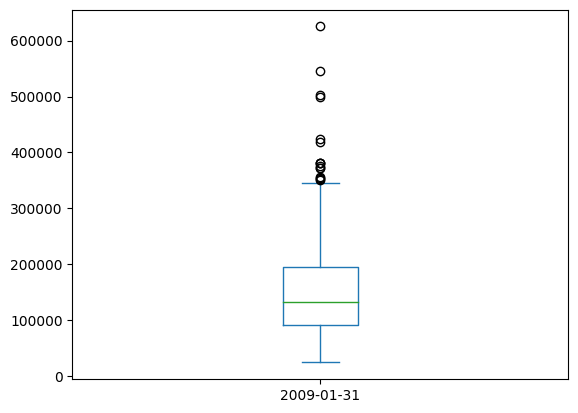

In [ ]:
grouped = df.groupby('State').get_group("GA")
q3=grouped['2009-01-31'].quantile(0.75)
q1=grouped['2009-01-31'].quantile(0.25)
iqr=1.5*(q3-q1)
lower_bound = q1 - iqr
upper_bound = q3 + iqr

outliers = grouped[(grouped['2009-01-31'] < lower_bound) | (grouped['2009-01-31'] > upper_bound)]
total_outliers = (len(outliers))
print(total_outliers)
grouped['2009-01-31'].plot.box()

In [ ]:
original_df=df.copy()

NameError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data
# data = pd.read_csv('housing_data.csv')

# Separate target from predictors
y = data.pop('Price')
X = data

# Preprocessing for numerical and categorical data
numerical_cols = ['Bedrooms']
categorical_cols = ['State','County']

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('model',model)
                         ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Model
pipeline.fit(X_train, y_train)

# Evaluate model
score = pipeline.score(X_test, y_test)
print('Model Accuracy: %.3f' % score)

# Make prediction
y_pred = pipeline.predict(X_test)

FileNotFoundError: ignored

In [ ]:

# print(grouped['2000-03-31'].median())
# print(grouped['2000-03-31'].mean())
# print(grouped['2022-03-31'].isnull().sum())
# print(grouped['2000-03-31'].plot.box())

#print(grouped[["RegionID","Metro"]])
#if more outliers: median
#if less outliers: mean
#grouped2 = df.groupby('Metro').get_group("")

states=df["State"].unique()
for state in states:
    grouped = df.groupby('State').get_group(state)
    for date in df.iloc[:,10:].columns:
        m=grouped[date].median()
        grouped[date].fillna(m, inplace=True)
        df.update(grouped)
        # q3=grouped[date].quantile(0.75)
        # q1=grouped[date].quantile(0.25)
        # lower_bound = q1 - iqr
        # upper_bound = q3 + iqr
        # iqr=1.5*(q3-q1)
        # outliers = grouped[(grouped[date] < lower_bound) | (grouped[date] > upper_bound)]
    #print(state, " : ",len(outliers),":", grouped.shape[0])
    # Get the total number of outliers
    #total_outliers = (len(outliers)/grouped.shape[0])
    #print(state, ": ", len(outliers),": ", total_outliers)


In [ ]:
print(df.iloc[:,10:].isnull().sum())